# Python API Workshop

### Activity 1: Introduction to the Python API

Follow along in the document and rename variables. Use <code>SHIFT</code> + <code>ENTER</code> to execute a cell of Python code or markdown.

# Using The API

The GIS object is the most important object when working with the ArcGIS API for Python. The GIS object represents the online GIS you are working with, be it ArcGIS Online or a Portal for ArcGIS. You use the GIS object to consume and publish GIS content and administrators may use it to manage GIS users, groups and datastores. The GIS object also includes a number of tools, including spatial analysis tools, big data analytics tools, raster analytics tools as well as helper services such as geocoding and geometry to help in your workflows.

# 1. Connect to the GIS

To use the GIS object, import <code>GIS</code> from the <code>arcgis.gis module</code>:
```python
from arcgis.gis import GIS
```

Alternatively, you can connect to ArcGIS Online (the default GIS used when the URL is not provided) as an anonymous user:
```python
gis = GIS()
```

Adding a '?' mark after an object and querying it brings up help for that object in the notebook:
```python
gis?
```

---

**Directions:** Run the cell below to import <code>GIS</code> from the <code>arcgis.gis module</code>.

In [1]:
from arcgis.gis import GIS

## 2. Enter login information

To create the GIS object, we pass in the url and our login credentials:
```python
gis = GIS("https://orgname.arcgis.com", "username", "password")
```

**Note:** The password does not need to be included in the script. If password is not included, the script will prompt you to enter your password. This is useful for sharing code with others.

---

**Directions:** Enter the appropriate login information in the code below.
* Organization: https://localgovne.maps.arcgis.com (or use your own organization URL)
* Username: Your provided username
* Password: Your provided password

In [56]:
gis = GIS("https://orgname.maps.arcgis.com", "username")

Enter password: ········


**Note:** The notebook provides intellisense and code-completion. Typing a dot after an object and hitting tab brings up a drop-down with its properties and methods:
![dropdown showing members of GIS class](http://esri.github.io/arcgis-python-api/notebooks/nbimages/01-dropdown.png)

## 3. Use helper objects to view your user profile information

The GIS object provides helper objects to manage the GIS resources, i.e. the users, groups, content and datastores. These helper utilities are in the form of helper objects named users, groups, content and datastores respectively. 

Each such helper object has similar patterns of usage: there are methods to <code>get()</code>, <code>search()</code> and <code>create()</code> the respective resources.

The ArcGIS API for Python is integrated with Jupyter Notebook to make it easy to visualize and interact with GIS resources. The user object has a rich representation that can be queried and visualized.

---

**Directions:** We will set the variable <code>user</code> to get your username. Replace <code>'username'</code> with your username. Then follow the prompts to run the subsequent scripts.

In [57]:
user = gis.users.get('username')
user

<User username:pkundu_localgovne>

The resources are implemented as Python dictionaries. You can query for the resource properties using the <code>resource['property']</code> notation:

In [58]:
user['firstName']

'Piyali'

The properties are also available as properties on the resource object, so you can use the dot notation to access them:

In [59]:
user.lastName

'Kundu'

The resources provide methods to update(), delete() and use the object.

## 4. Visualize information in an interactive map

The GIS object includes a map widget that can be used to visualize the content of your GIS as well as see the results of your analysis. Let's bring up a map of New York, NY using the following code layout, replacing <code>"location"</code> with a specific location:

```python
map1 = gis.map("location")```

<b>Note:</b> Do not use <code>map</code> as your variable name!

---

**Directions:** Run the cell below to visualize an interactive map centered on New York City. You can adjust the location to viisualize other locations.

In [60]:
m1 = gis.map("New York, NY")
m1

MapView(layout=Layout(height='400px', width='100%'))

We can search for content in our GIS. Let's search for <i>administrative boundaries</i> in New York City. We do that by calling <code>gis.content.search()</code> and for each web map or web layers that gets returned, we can display its rich representation within the notebook:

<Item title:"NYC Neighborhoods" type:Feature Layer Collection owner:pkundu_localgovne>

<Item title:"311 Service Requests (Jan 2019 to Present)" type:CSV owner:pkundu_localgovne>

<Item title:"NYC Neighborhoods" type:Shapefile owner:pkundu_localgovne>

<Item title:"NYC Boroughs" type:Shapefile owner:pkundu_localgovne>

<Item title:"311 Service Requests (Jan 2019 to Present)" type:Feature Layer Collection owner:pkundu_localgovne>
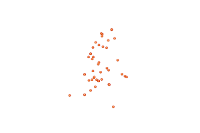

<Item title:"Open Space (Parks)" type:Feature Layer Collection owner:pkundu_localgovne>
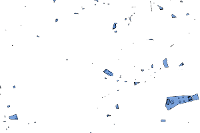

<Item title:"NYC Parks Zones" type:Feature Layer Collection owner:pkundu_localgovne>
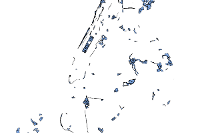

<Item title:"NYC 2010 Census Tracts" type:Shapefile owner:pkundu_localgovne>

<Item title:"NYC Boroughs" type:Feature Layer Collection owner:pkundu_localgovne>
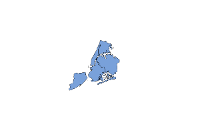

<Item title:"Open Space (Parks)" type:Shapefile owner:pkundu_localgovne>

In [61]:
from IPython.display import display

items = gis.content.search('New York City')
for item in items:
    display(item)

We can add then add the returned web layers to our map. To add the ‘New York City Neighborhoods’ layer returned above, we call <code>map.add_layer()</code> and pass in the corresponding item. This adds the layer to the map widget and redisplays the map in a new cell below.

**Note:** Indexes start at <code>0</code>.

In [62]:
m1.add_layer(items[0])
m1

MapView(jupyter_target='notebook', layout=Layout(height='400px', width='100%'), ready=True, zoom=8.0)

You can continue to add different layers to the map based on their indexes in the list.

## 5. Work with Spatially Enabled Data Frames
The [`Spatially Enabled DataFrame`](https://esri.github.io/arcgis-python-api/apidoc/html/arcgis.features.toc.html#spatialdataframe) (SEDF) creates a <i>simple, intutive, <b>in-memory</b></i> object that can easily read and write geospatial data (i.e., geometric and attribute data). 

<blockquote>
    New at version 1.5, the Spatially Enabled DataFrame is an evolution of the <code>SpatialDataFrame</code> object that you may be familiar with. While the <code>SDF</code> object is still avialable for use, the team has stopped active development of it and is promoting the use of this new Spatially Enabled DataFrame pattern. The SEDF provides you better memory management, ability to handle larger datasets and is the pattern that Pandas advocates as the path forward.</blockquote>

The Spatially Enabled DataFrame inserts a custom namespace called `spatial` into the popular [Pandas](https://pandas.pydata.org/) [DataFrame](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe) structure to give it spatial abilities. This allows you to use intutive, pandorable operations on both the attribute and spatial columns. Thus, the SEDF is based on data structures inherently suited to data analysis, with natural operations for the filtering and inspecting of subsets of values which are fundamental to statistical and geographic manipulations.

The dataframe reads from many **sources**, including shapefiles, [Pandas](https://pandas.pydata.org/) [DataFrames](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe), feature classes, GeoJSON, and Feature Layers.

---

<b>Directions:</b> For our next activity, lets start by creating a new map with the dark gray vector basemap.

In [63]:
m2 = gis.map("New York, NY")
m2.basemap = 'dark-gray-vector'
m2

MapView(layout=Layout(height='400px', width='100%'))

We will search for an  item in the Organizaiton (in this case, a layer with various demographics information for NYC boroughs) and add it to the map. We use <code>gis.content.get()</code> to retrieve an item from the organizaiton by its item ID. Next, we obtain the first feature layer from the item with <code> item.layers[0]</code>

In [64]:
item = gis.content.get("13b0a0d02a434116b3cd98ad4e0c70f8")
flayer = item.layers[0]
m2.add_layer(flayer)

Finally, we will import the Pandas and ArcGIS libraries, use <code>from_layer</code> static method in the 'spatial' namespace on the Pandas' DataFrame and view the first 5 records in the layer with <code>sdf.head()</code>.

In [65]:
# Import pandas and ArcGIS libraries
import pandas as pd
from arcgis.features import GeoAccessor, GeoSeriesAccessor

# create a Spatially Enabled DataFrame object
sdf = pd.DataFrame.spatial.from_layer(flayer)
sdf.head()

,ACSPOVINDX,ENRICH_FID,HasData,ID,OBJECTID,POPGRWCYFY,SENIORS_CY,SHAPE,Shape__Area,Shape__Length,TOTPOP_CY,TOTPOP_FY,aggregationMethod,apportionmentConfidence,boro_code,boro_name,populationToPolygonSizeRating,shape_leng,sourceCountry
0,102.1,1,1,0,1,0.48,78960,"{""rings"": [[[-8246794.1978, 4960600.6729], [-8...",2.618035e+08,132710.507374,484443,496106,BlockApportionment:US.BlockGroups,2.576,5,Staten Island,2.191,330470.010332,US
1,116.1,2,1,0,2,0.52,266127,"{""rings"": [[[-8229449.8241, 4994307.5828], [-8...",1.032201e+08,144706.117746,1660590,1703864,BlockApportionment:US.BlockGroups,2.576,1,Manhattan,2.191,359299.095385,US
2,223.5,3,1,0,3,0.68,186443,"{""rings"": [[[-8223499.022, 4998256.9376], [-82...",1.929191e+08,187152.743886,1471316,1522018,BlockApportionment:US.BlockGroups,2.576,2,Bronx,2.191,464223.533367,US
3,161.3,4,1,0,4,0.78,370181,"{""rings"": [[[-8232565.655, 4973936.9751], [-82...",3.129690e+08,297782.623773,2691350,2798271,BlockApportionment:US.BlockGroups,2.576,3,Brooklyn,2.191,741074.466597,US
4,107.2,5,1,0,5,0.62,365494,"{""rings"": [[[-8217660.381, 4983035.0585], [-82...",4.928011e+08,360364.373960,2370829,2445605,BlockApportionment:US.BlockGroups,2.576,4,Queens,2.191,896310.510913,US


We can continue to view field information of the newly created spatially-enabled data frame.

In [66]:
# View 
sdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 19 columns):
ACSPOVINDX                       5 non-null float64
ENRICH_FID                       5 non-null int64
HasData                          5 non-null int64
ID                               5 non-null object
OBJECTID                         5 non-null int64
POPGRWCYFY                       5 non-null float64
SENIORS_CY                       5 non-null int64
SHAPE                            5 non-null geometry
Shape__Area                      5 non-null float64
Shape__Length                    5 non-null float64
TOTPOP_CY                        5 non-null int64
TOTPOP_FY                        5 non-null int64
aggregationMethod                5 non-null object
apportionmentConfidence          5 non-null float64
boro_code                        5 non-null int64
boro_name                        5 non-null object
populationToPolygonSizeRating    5 non-null float64
shape_leng                     

Finally, we can plot information this spatially-enabled data frame on a map using class breaks renderer. Below, we will plot the current year senior population using the field <code>'SENIORS_CY'</code> field.

In [67]:
sdf.spatial.plot(map_widget = m1,
                renderer_type='c',  # for class breaks renderer
                method='esriClassifyNaturalBreaks',  # classification algorithm
                class_count=5,  # choose the number of classes
                col='SENIORS_CY',  # column to get unique values from
                cmap='prism',  # color map to pick colors from for each class
               )

True

In [68]:
m1

MapView(jupyter_target='notebook', layout=Layout(height='400px', width='100%'), ready=True)